In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
batsz=32
imgsz=256
epoch=50

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
        "Image_dataset",
        shuffle=True,
        image_size=(imgsz,imgsz),
        batch_size=batsz)


Found 2148 files belonging to 2 classes.


In [4]:
class_names=dataset.class_names

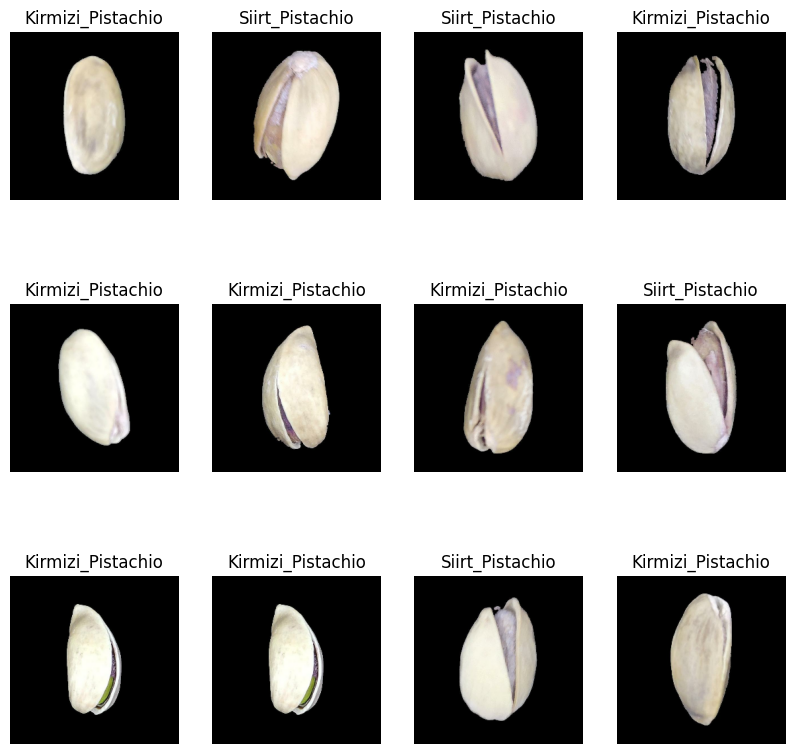

In [5]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(2):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    

In [6]:
len(dataset)

68

80% == Training
10% == validaton
10% == test

In [7]:
trainp=0.8
len(dataset)*trainp


54.400000000000006

In [8]:
train_dataset=dataset.take(54)

In [9]:
rem_dts = dataset.skip(54) 

In [10]:
val_dataset=rem_dts.take(7)

In [11]:
test_dataset=rem_dts.skip(7)

In [12]:
def partition(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffel=True,shuffel_size=10000):
    if shuffel:
        ds=ds.shuffle(shuffel_size,seed=12)
        
    ds_size=len(ds)
    train_size=int(train_split *  ds_size)
    val_size=int(val_split * ds_size)
    test_size=int(train_split * ds_size)
    train_ds=ds.take(train_size)
    val_ds= ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [13]:
train_ds,val_ds,test_ds=partition(dataset)

In [14]:
train_ds= train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds= val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds= test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
resize_and_rescale=tf.keras.Sequential([
            layers.experimental.preprocessing.Resizing(imgsz,imgsz),
            layers.experimental.preprocessing.Rescaling(1.0/256)
])

In [16]:
data_argumentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

MODEL BUILDING

In [17]:
input_shape = (batsz, imgsz, imgsz, 3)
n_classes = 2

# Build the model
model = models.Sequential([
    resize_and_rescale,
    data_argumentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),  
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# Build the model with the specified input shape
model.build(input_shape=input_shape)

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [19]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history = model.fit(
    train_ds,
    batch_size=batsz,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 61s 1s/step - loss: 0.7239 - accuracy: 0.7014 - val_loss: 0.3587 - val_accuracy: 0.8229
Epoch 2/50
54/54 [==============================] - 48s 893ms/step - loss: 0.4015 - accuracy: 0.8229 - val_loss: 0.3732 - val_accuracy: 0.8542
Epoch 3/50
54/54 [==============================] - 52s 961ms/step - loss: 0.3856 - accuracy: 0.8160 - val_loss: 0.3402 - val_accuracy: 0.8490
Epoch 4/50
54/54 [==============================] - 48s 891ms/step - loss: 0.3852 - accuracy: 0.8264 - val_loss: 0.3949 - val_accuracy: 0.7917
Epoch 5/50
54/54 [==============================] - 47s 871ms/step - loss: 0.3608 - accuracy: 0.8397 - val_loss: 0.3578 - val_accuracy: 0.8542
Epoch 6/50
54/54 [==============================] - 48s 889ms/step - loss: 0.3465 - accuracy: 0.8449 - val_loss: 0.3333 - val_accuracy: 0.8594
Epoch 7/50
54/54 [==============================] - 48s 886ms/step - loss: 0.3661 - accuracy: 0.8409 - val_loss: 0.3290 - val_accuracy: 0.8698
Ep

In [21]:
history

In [22]:
scores = model.evaluate(test_ds)y


8/8 [==============================] - 3s 171ms/step - loss: 0.5664 - accuracy: 0.7695


In [23]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
type(history.history['loss'])

list

In [26]:
len(history.history['loss'])

50

In [27]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.723938524723053,
 0.40152010321617126,
 0.38556551933288574,
 0.3852297365665436,
 0.3607698678970337]

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

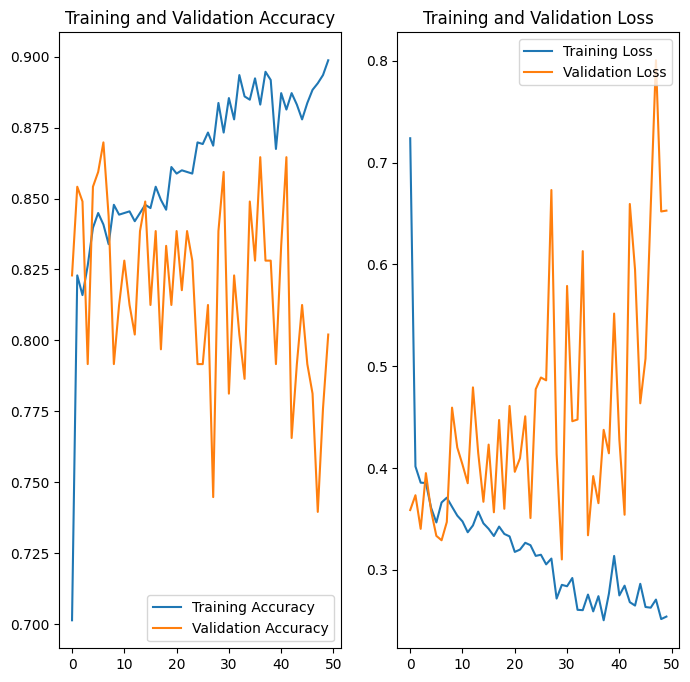

In [29]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epoch), acc, label='Training Accuracy')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Kirmizi_Pistachio
1/1 [==============================] - 0s 335ms/step
predicted label: Kirmizi_Pistachio


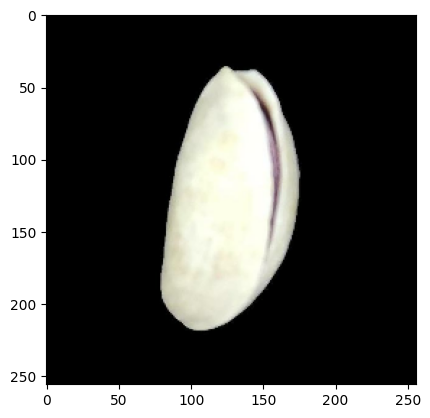

In [30]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 21ms/step


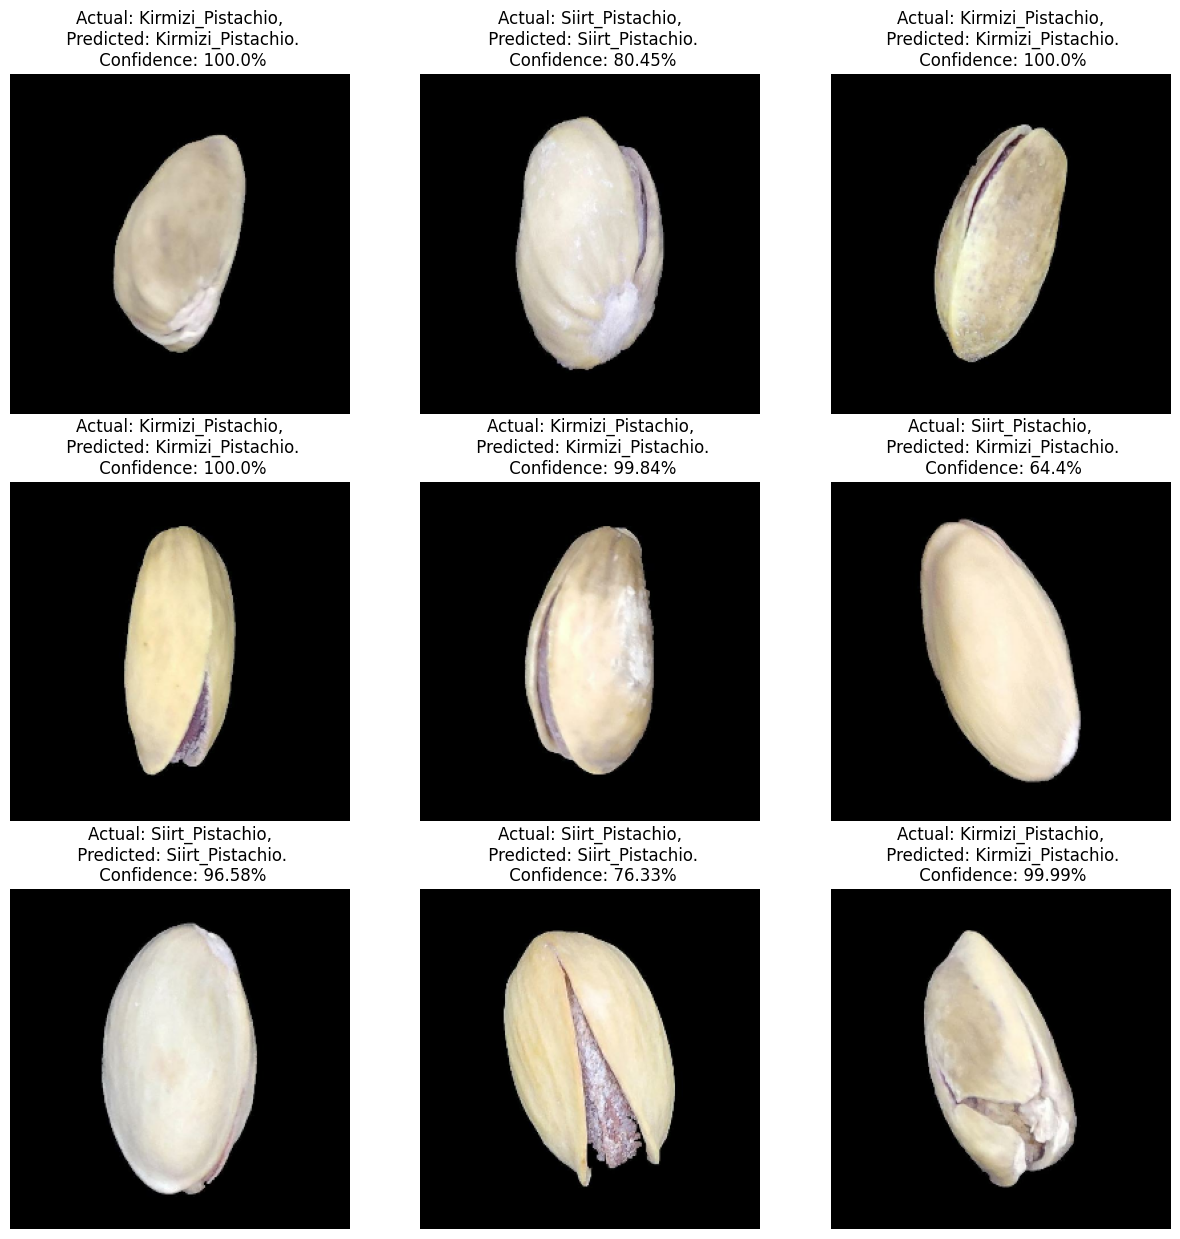

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [33]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../models'

In [ ]:
model.save("../potatoes.h5")